In [1]:
# 构建一个简单的卷积网络用于训练mnist数据集：
from fakeras import NeuralNetwork
from fakeras.layer import (
    Conv2D,
    Dense,
    Flatten,
    MaxPool2D,
)

model = NeuralNetwork()
model.add(Conv2D(32, (3, 3), 'relu', 'he', 
                 input_shape=(1, 28, 28)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), 'relu', 'he',))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), 'relu', 'he'))
model.add(Flatten())
model.add(Dense(64, 'relu', 'he'))
model.add(Dense(10, 'softmax', 'he'))

In [2]:
import numpy as np

def one_hot_encode(dataset, feature_num, dtype='float64'):
    sample_num = len(dataset)
    dataset_encoded = np.zeros((sample_num, feature_num), dtype=dtype)
    for sidx, widx in enumerate(dataset):
        dataset_encoded[sidx, widx] = 1
    return dataset_encoded

In [3]:
# 在mnist数据集上训练卷积神经网络：
from fakeras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
dtype = 'float32'
x_train = x_train.reshape(60000, 1, 28, 28).astype(dtype) / 255
x_test = x_test.reshape(10000, 1, 28, 28).astype(dtype) / 255

y_train = one_hot_encode(y_train, feature_num=10, dtype=dtype)
y_test = one_hot_encode(y_test, feature_num=10, dtype=dtype)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 1, 28, 28)
(60000, 10)
(10000, 1, 28, 28)
(10000, 10)


In [4]:
# 编译网络然后训练：
# x_train = x_train[1000:]
# y_train = y_train[1000:]
model.compile('rmsprop', 'cce', 'acc')
model.fit(inputs=x_train,
          targets=y_train,
          batch_size=64,
          epochs=5,
          lr=0.001,
          verbose=True,
          use_every_sample=True)

Epoch 1/5 - loss: 0.073869 - acc: 0.976933 - time used: 486.4839754104614s.


Epoch 2/5 - loss: 0.048870 - acc: 0.986517 - time used: 485.702999830246s.


Epoch 3/5 - loss: 0.040269 - acc: 0.989067 - time used: 486.1599898338318s.


Epoch 4/5 - loss: 0.050554 - acc: 0.985650 - time used: 483.9889929294586s.


Epoch 5/5 - loss: 0.032567 - acc: 0.990333 - time used: 483.8140082359314s.


[{'epoch': 0,
  'loss': 0.07386909657202088,
  'acc': 0.9769333333333436,
  'time_used': 486.4839754104614},
 {'epoch': 1,
  'loss': 0.048869989977632644,
  'acc': 0.9865166666666768,
  'time_used': 485.702999830246},
 {'epoch': 2,
  'loss': 0.0402692600804804,
  'acc': 0.9890666666666766,
  'time_used': 486.1599898338318},
 {'epoch': 3,
  'loss': 0.050554403787301985,
  'acc': 0.9856500000000101,
  'time_used': 483.9889929294586},
 {'epoch': 4,
  'loss': 0.03256728837926762,
  'acc': 0.9903333333333433,
  'time_used': 483.8140082359314}]

In [5]:
result = model.evaluate(x_test, y_test)
print(result)

{'loss': 0.06413841462945355, 'metric': 0.9855000000000007}


prdict values are:  [6 9 3 6 2 1 5 8 8 0]
target values are:  [6 9 3 6 2 1 5 8 8 0]


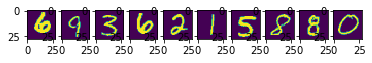

In [6]:
# 最后，从测试集中随机抽取10个样本，将它们还原为手写数字图片，
# 使用网络对它们进行预测，并将预测值和目标值比较
import matplotlib.pyplot as plt

indices = np.random.choice(len(x_test), 10, replace=False)
x_show = x_test[indices]
y_show = y_test[indices]
x_to_pic = x_show.copy()
x_to_pic.resize(10, 1, 28, 28)
y_pred = model.predict(x_show)
y_pred_max = y_pred.argmax(axis=1)
y_show_max = y_show.argmax(axis=1)
plt.figure()
print('prdict values are: ', y_pred_max)
print('target values are: ', y_show_max)
for i in range(len(y_pred_max)):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_to_pic[i][0])